
# Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.











In this project i will answer  four  questions :

1- Who is more likely to attend appointments (male or female)?

2- Does patient who received SMS more likely to show up ?

3- What is patient ages who visit hospital more ? And what are the ages that have the less commitment to attend?

4- Are patient have Diabetes committed to attendance or not ?

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns               


#read data
df = pd.read_csv('KaggleV2-May-2016.csv')

<a id='wrangling'></a>
## Data Wrangling



In [83]:
#to see some data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [84]:
#to see how many column and row 
df.shape

(110527, 14)

In [85]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


there is mistake min age = -1 

In [86]:
# to see data type for column 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [88]:

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [89]:
sum(df.duplicated())

0

In [90]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No



### Data Cleaning

 

In [91]:
# to Delete the row that has an age less than zero
df.query('Age <0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [92]:
df.drop(index=99832 , axis=0  , inplace=True)

In [93]:
# We don't need AppointmentID column
df.drop(['AppointmentID'], axis =1 , inplace = True )

In [94]:
#to check
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [95]:
# convert 'ScheduledDay' and 'AppointmentDay' columns to datetime format
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [96]:
#covert 'PatientId' to int type 
df['PatientId']= df.PatientId.astype(int)

In [97]:
# to check
df.dtypes

PatientId                       int32
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### 1-  Who is more likely to attend appointments (male or female)?

In [98]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

patients from female  more than male 

In [99]:
df.groupby(['Gender', 'No-show'])['PatientId'].count()



Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: PatientId, dtype: int64

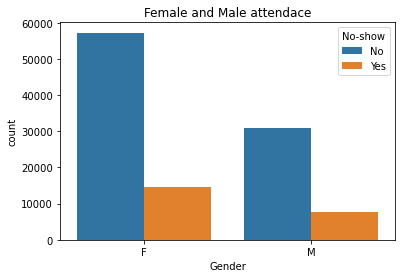

In [100]:
sns.countplot(x=df['Gender'], hue=df['No-show']);
plt.title('Female and Male attendace');

  The number of females attending appointments is more than males, but the data of females is more

### 2- Does patient who received SMS more likely to show up ?

In [101]:
def proportions (data ,n,column_count ) :
    column_with = column_count['No',1] / data.iloc[:,n].value_counts()[1]
    column_without =column_count['No',0] / data.iloc[:, n].value_counts()[0]
    
    return column_with , column_without

In [102]:
sms = df.groupby(["No-show","SMS_received"])['PatientId'].count()
sms

No-show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: PatientId, dtype: int64

In [103]:
received_sms , not_received_sms = proportions(data=df ,n=11,column_count= sms) 
received_sms , not_received_sms

(0.7242545516036301, 0.8329646607323703)

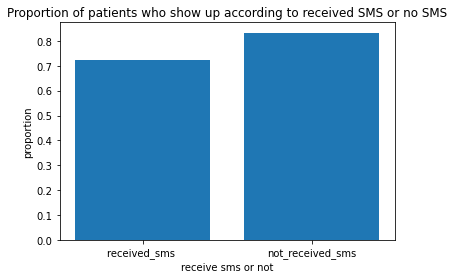

In [104]:
plt.bar([1,2],[received_sms,not_received_sms]);
plt.xticks([1, 2], ['received_sms ', 'not_received_sms']);
plt.title('Proportion of patients who show up according to received SMS or no SMS');
plt.xlabel('receive sms or not');
plt.ylabel('proportion');

patient who did not received SMS more likely to attend to appointment than who received SMS

### 3-  What is patient ages who visit hospital more ? And what are the ages that have the less commitment to attend?

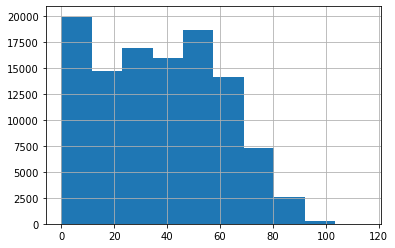

In [105]:
df['Age'].hist();


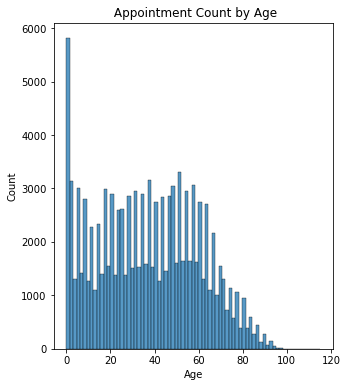

In [106]:
plt.figure(figsize=(5,6));
sns.histplot(data=df,x='Age');
plt.title(' Appointment Count by Age');


Appointments start decreasing after the age of 60, and most appointments are for less than a year old

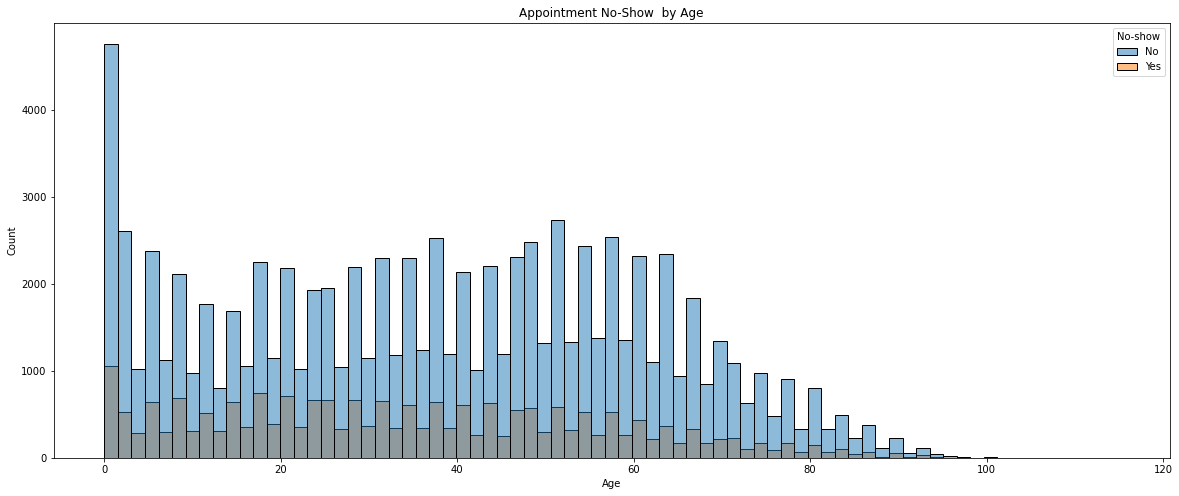

In [107]:
plt.figure(figsize=(20,8));
plt.title("Appointment No-Show  by Age");
sns.histplot(x="Age", data=df, hue="No-show");




Non-attendance increased at the age of 20 and decreases at the age of 60 and beyond

### 4- Are patient have Diabetes committed to attendance or not ?

In [108]:
diabetes = df.groupby(['No-show','Diabetes'])['No-show'].count()
diabetes

No-show  Diabetes
No       0           81694
         1            6513
Yes      0           20889
         1            1430
Name: No-show, dtype: int64

In [109]:
have_diabetes , have_not_diabetes = proportions(data=df ,n=8,column_count= diabetes) 
have_diabetes , have_not_diabetes

(0.8199672667757774, 0.7963697688700857)

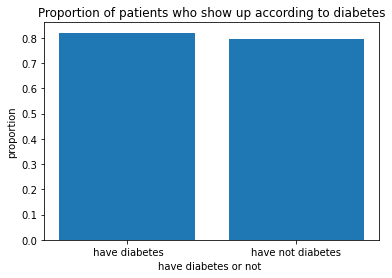

In [111]:
plt.bar([1,2],[have_diabetes ,have_not_diabetes]);
plt.xticks([1, 2], [' have diabetes', 'have not diabetes']);
plt.title('Proportion of patients who show up according to diabetes');
plt.xlabel('have diabetes or not ');
plt.ylabel('proportion');

Diabetics are more disciplined in attend to appointments

<a id='conclusions'></a>
## Conclusions
After doing the analyses:
- women visit the hospital more than men
- receive SMS it wasn't as I expected, those who received SMS are more likely to absent
- the most appointments were for young people. Also, the lack of commitment to attendance rises at the age of 20, less than a year and decreases for the old age 
- People with diabetes are more likely to attend

### limitations


- The dataset needs clarification like a handcap column have four values but did not clarified them . Also, I assumed the age of 0 for newborns  not error 